In [124]:
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport
import graphviz
import csv

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_extraction.text import CountVectorizer

In [165]:
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer

In [4]:
ins_df = pd.read_csv('insurance.csv')
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
ins_df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
ins_df_onehot = pd.get_dummies(ins_df, columns=['sex', 'smoker', 'region']).drop('charges', axis=1)
ins_df_target = ins_df['charges']
ins_df_onehot

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(ins_df_onehot.values, ins_df_target.values, random_state=0)

In [9]:
pipe = make_pipeline(MinMaxScaler(), LinearRegression()).fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7958786376014413

In [10]:
y_pred = pipe.predict(X_test)

In [11]:
pd.DataFrame(zip(y_test, y_pred), columns=['actual', 'predict'])

,actual,predict
0,9724.53000,11121.101409
1,8547.69130,9369.083452
2,45702.02235,38349.258807
3,12950.07120,16331.935006
4,9644.25250,7041.227706
...,...,...
330,13224.05705,15034.106647
331,4433.91590,7121.723799
332,9377.90470,10602.930893
333,3597.59600,7050.864796


In [12]:
pipe.named_steps['linearregression'].coef_

array([ 1.15069979e+04,  1.23886402e+04,  2.21106880e+03, -6.63153624e+00,
        6.63153624e+00, -1.18283103e+04,  1.18283103e+04,  5.35344576e+02,
        3.42211643e+02, -5.44457080e+02, -3.33099139e+02])

In [13]:
pipe2 = make_pipeline(MinMaxScaler(), Lasso(alpha=0.1)).fit(X_train, y_train)
pipe2.score(X_test, y_test)

0.7958757989117826

In [14]:
pipe2 = make_pipeline(MinMaxScaler(), SGDRegressor()).fit(X_train, y_train)
pipe2.score(X_train, y_train), pipe2.score(X_test, y_test)

(0.733354478419481, 0.7947307617885702)

In [15]:
pipe2.named_steps['sgdregressor'].n_iter_

87

In [16]:
cer_df = pd.read_csv('cereal.csv')
cer_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [17]:
cer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [18]:
cer_df.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

In [19]:
cer_df2 = (cer_df
.drop(['name', 'mfr', 'type', 'rating'], axis=1)
)
cer_df2

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00


In [20]:
cer_df2.nunique()

calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
dtype: int64

<AxesSubplot:xlabel='sugars', ylabel='rating'>

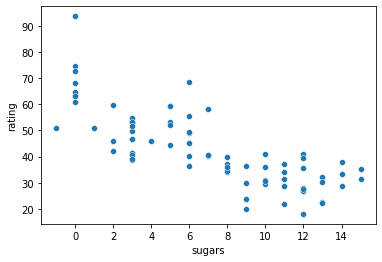

In [21]:
sns.scatterplot(data=cer_df, x='sugars', y='rating')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(cer_df2.values, cer_df['rating'].values, random_state=0)

In [23]:
pipe = make_pipeline(MinMaxScaler(), PolynomialFeatures(degree=2), LinearRegression()).fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(1.0, 0.9889047584678937)

In [24]:
rfr = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
rfr.score(X_train, y_train), rfr.score(X_test, y_test)

(0.9800723812521709, 0.6766945776305464)

In [25]:
pd.DataFrame(zip(y_test, pipe.predict(X_test)), columns=['actual', 'predict'])

,actual,predict
0,29.924285,30.720309
1,49.787445,50.692307
2,39.703400,39.048093
3,60.756112,59.761116
4,45.811716,46.243518
5,58.345141,58.113211
6,59.363993,59.490317
7,53.371007,57.081702
8,34.139765,33.595883
9,38.839746,36.364308


In [26]:
alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
    ridge=Ridge(alpha=a)
    ridge.fit(load_diabetes()['data'], load_diabetes()['target'])
    data.append(pd.Series(np.hstack([ridge.coef_])))

In [27]:
df_ridge = pd.DataFrame(data, index=alpha)
df_ridge.columns = load_diabetes()['feature_names']
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.549162,-239.086958,520.369375,323.822745,-712.322159,413.379125,65.811323,167.513007,720.939924,68.123360
0.010,-7.197534,-234.549764,520.588601,320.517131,-380.607135,150.484671,-78.589275,130.312521,592.347959,71.134844
0.100,1.308705,-207.192418,489.695171,301.764058,-83.466034,-70.826832,-188.678898,115.712136,443.812917,86.749315
1.000,29.466112,-83.154276,306.352680,201.627734,5.909614,-29.515495,-152.040280,117.311732,262.944290,111.878956
10.000,19.812842,-0.918430,75.416214,55.025160,19.924621,13.948715,-47.553816,48.259433,70.143948,44.213892


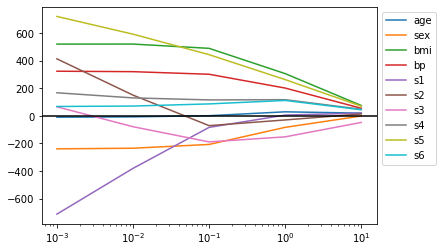

In [28]:
plt.semilogx(df_ridge)
plt.legend(df_ridge.columns, bbox_to_anchor=(1, 1))
plt.axhline(color='black')
plt.show()

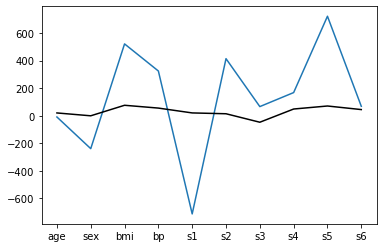

In [29]:
plt.plot(df_ridge.loc[0.001])
plt.plot(df_ridge.loc[10], color='black')

In [30]:
alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
    lasso=Lasso(alpha=a)
    lasso.fit(load_diabetes()['data'], load_diabetes()['target'])
    data.append(pd.Series(np.hstack([lasso.coef_])))

In [31]:
df_lasso = pd.DataFrame(data, index=alpha)
df_lasso.columns = load_diabetes()['feature_names']
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


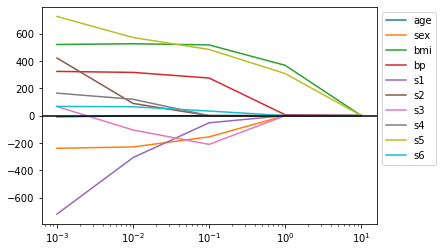

In [32]:
plt.semilogx(df_lasso)
plt.legend(df_lasso.columns, bbox_to_anchor=(1, 1))
plt.axhline(color='black')
plt.show()

In [33]:
body_df = pd.read_csv('bodyPerformance.csv')
body_df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [34]:
body_target = body_df['class'].where(body_df['class'] == 'A').notna().astype('int').values

In [35]:
body_data = pd.get_dummies(body_df.drop('class', axis=1)).values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(body_data, body_target, random_state=0)

In [37]:
pipe = make_pipeline(MinMaxScaler(), LogisticRegression(C=10, max_iter=10000)).fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.8452807646356033, 0.849507315616602)

In [38]:
pipe.predict_proba(X_test), pipe.predict(X_test)

(array([[0.39172314, 0.60827686],
        [0.93965228, 0.06034772],
        [0.68699552, 0.31300448],
        ...,
        [0.23486034, 0.76513966],
        [0.9419083 , 0.0580917 ],
        [0.20083097, 0.79916903]]),
 array([1, 0, 0, ..., 1, 0, 1]))

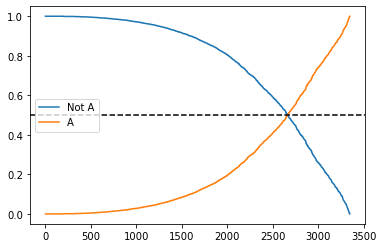

In [39]:
(pd.DataFrame(pipe.predict_proba(X_test), columns=['Not A', 'A'])
.sort_values(by='A')
.round(3)
.reset_index(drop=True)
.plot()
)
plt.axhline(y=0.5, color='black', linestyle='--')

In [40]:
roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])

0.9225112916237902

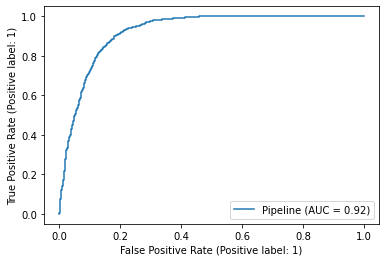

In [41]:
RocCurveDisplay.from_estimator(pipe, X_test, y_test)

In [42]:
body_target = body_df['class'].replace(dict(zip(np.unique(body_df['class']), [0, 1, 2, 3])))
body_target

0        2
1        0
2        2
3        1
4        1
        ..
13388    2
13389    3
13390    0
13391    3
13392    2
Name: class, Length: 13393, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(body_data, body_target, random_state=0)

In [44]:
pipe = make_pipeline(MinMaxScaler(), LogisticRegression(solver='lbfgs', multi_class='multinomial', C=10, max_iter=10000)).fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.6116089207487057, 0.6291430277694834)

In [45]:
pipe = make_pipeline(MinMaxScaler(), RandomForestClassifier(n_estimators=100, max_depth=12)).fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9226403823178017, 0.7414153478650344)

In [46]:
pipe = make_pipeline(StandardScaler(), SVC()).fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.7181401831939467, 0.7017020005971932)

In [47]:
pipe.named_steps['svc'].support_.shape

(7389,)

In [48]:
random_seed = np.random.RandomState(seed=0)
X = np.sort(5 * random_seed.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - random_seed.rand(8))

In [49]:
pipe = make_pipeline(SVR(C=10, gamma=0.1)).fit(X, y)
pipe.score(X, y)

0.759529058382964

In [50]:
param_grid = {'C':np.logspace(-2, 1, 4), 'gamma':np.logspace(-2, 1, 4)}
svr = SVR()
grid = GridSearchCV(svr, param_grid=param_grid, cv=5, n_jobs=-1).fit(X, y)
grid.best_params_, grid.best_score_, grid.score(X, y)

({'C': 10.0, 'gamma': 0.1}, -0.8377362914654494, 0.759529058382964)

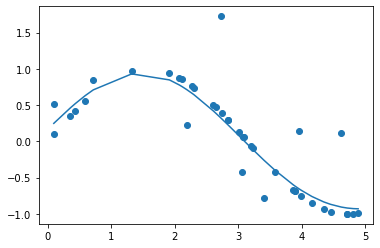

In [51]:
plt.scatter(X, y)
plt.plot(X, grid.predict(X))

In [52]:
liv_df = pd.read_csv('indian_liver_patient.csv')
liv_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [53]:
liv_df.nunique()

Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
Dataset                         2
dtype: int64

In [54]:
liv_df_target = liv_df['Dataset']
liv_df_data = pd.get_dummies(liv_df.iloc[:, 0:-1])
liv_df_data

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,0,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,0,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,0,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,0,1


In [55]:
liv_df_data = liv_df_data.fillna(liv_df_data.mean().round(2))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(liv_df_data.values, liv_df_target.values)

In [57]:
knnc = KNeighborsClassifier(n_neighbors=5, weights='distance').fit(X_train, y_train)
knnc.score(X_test, y_test), f1_score(y_test, knnc.predict(X_test))

(0.6643835616438356, 0.772093023255814)

In [58]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=2).fit(X_train, y_train)
rfc.score(X_test, y_test), f1_score(y_test, rfc.predict(X_test))

(0.7191780821917808, 0.8366533864541833)

In [59]:
rs = np.random.RandomState(0)
X = np.sort(5 * rs.rand(400, 1), axis=0)
T = np.linspace(0, 5, 500).reshape(-1, 1)
y = np.sin(X).ravel()
y[::1] += 1 * (0.5 - rs.rand(400))

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(300, 1)

In [61]:
knn_uni = KNeighborsRegressor(n_neighbors=20, weights='uniform').fit(X_train, y_train)
knn_dis = KNeighborsRegressor(n_neighbors=20, weights='distance').fit(X_train, y_train)
knn_uni.score(X_test, y_test), knn_dis.score(X_test, y_test)

(0.8237206540002674, 0.8112540012207146)

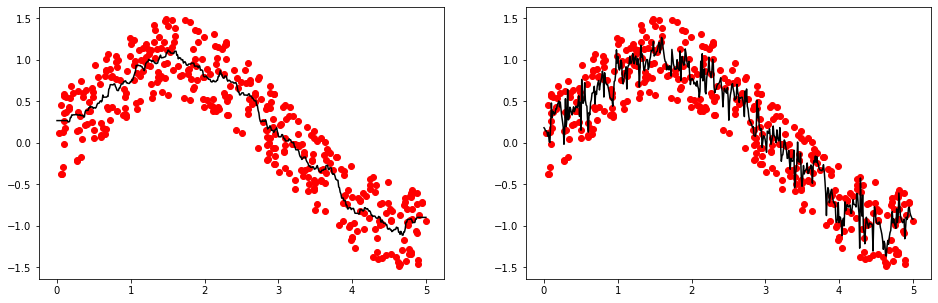

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
ax1, ax2 = axs
for weight, ax in zip(['uniform', 'distance'], axs):
    knn = KNeighborsRegressor(n_neighbors=20, weights=weight).fit(X, y)
    y_pred = knn.predict(T)
    ax.scatter(X, y, color='red')
    ax.plot(T, y_pred, color='black')

In [63]:
X_train, X_test, y_train, y_test = train_test_split(liv_df_data.values, liv_df_target.values)

In [64]:
dt = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
dt.score(X_test, y_test)

0.6232876712328768

In [65]:
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           1       0.63      0.93      0.75        90
           2       0.54      0.12      0.20        56

    accuracy                           0.62       146
   macro avg       0.59      0.53      0.48       146
weighted avg       0.60      0.62      0.54       146



0.7089285714285715

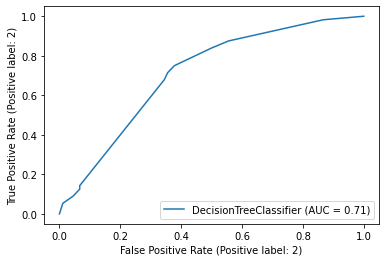

In [66]:
RocCurveDisplay.from_estimator(dt, X_test, y_test)
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

In [67]:
(pd.Series(dt.feature_importances_, index=liv_df_data.columns)
.reset_index()
.rename({'index':'features', 0:'importances'}, axis=1)
)

,features,importances
0,Age,0.132821
1,Total_Bilirubin,0.065096
2,Direct_Bilirubin,0.094426
3,Alkaline_Phosphotase,0.249069
4,Alamine_Aminotransferase,0.000000
5,Aspartate_Aminotransferase,0.369921
6,Total_Protiens,0.088667
7,Albumin,0.000000
8,Albumin_and_Globulin_Ratio,0.000000
9,Gender_Female,0.000000


In [68]:
rs = np.random.RandomState(0)
X = np.sort(5 * rs.rand(400, 1), axis=0)
T = np.linspace(0, 5, 500).reshape(-1, 1)
y = np.sin(X).ravel()
y[::1] += 1 * (0.5 - rs.rand(400))

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

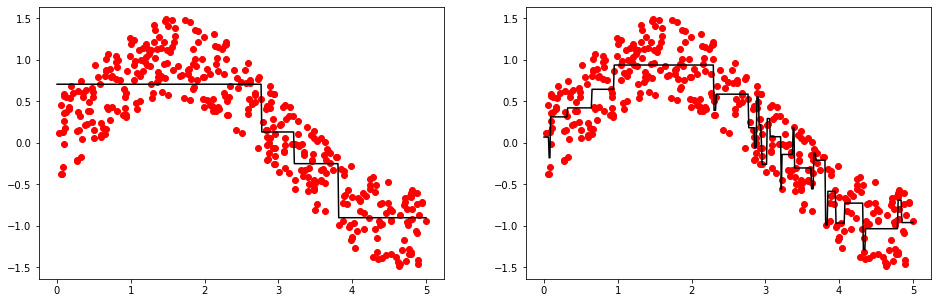

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
for depth, ax in zip([2, 5], axs):
    dtr = DecisionTreeRegressor(max_depth=depth).fit(X, y)
    y_pred = dtr.predict(T)
    ax.scatter(X, y, color='red')
    ax.plot(T, y_pred, color='black')

In [71]:
dtr = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
dtr.score(X_test, y_test)

0.7903500659898299

In [72]:
can_df = pd.read_csv('breast-cancer.csv')
can_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

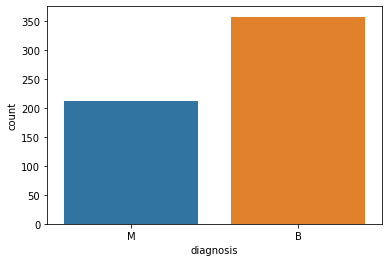

In [73]:
sns.countplot(data=can_df, x='diagnosis')

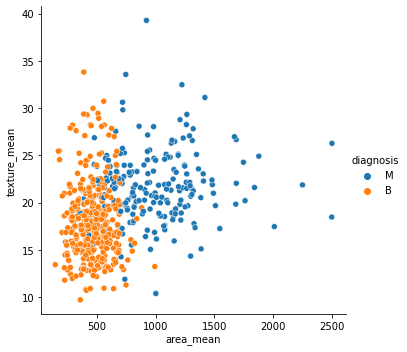

In [74]:
sns.relplot(data=can_df, x='area_mean', y='texture_mean', hue='diagnosis')

In [75]:
can_df = (can_df
.assign(diagnosis=lambda df: df['diagnosis'].replace({'M':1, 'B':0}))
)
can_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [76]:
can_df.isna().sum().sum()

0

In [77]:
X = can_df.iloc[:, 2:].values
y = can_df.loc[:, 'diagnosis'].values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [79]:
bag = BaggingClassifier(base_estimator=LogisticRegression(max_iter=10000), n_estimators=10, random_state=0).fit(X_train, y_train)
bag.score(X_test, y_test)

0.951048951048951

In [80]:
roc_auc_score(y_test, bag.predict(X_test)), precision_score(y_test, bag.predict(X_test)), recall_score(y_test, bag.predict(X_test))

(0.9572327044025157, 0.896551724137931, 0.9811320754716981)

In [81]:
confusion_matrix(y_test, bag.predict(X_test))

array([[84,  6],
       [ 1, 52]], dtype=int64)

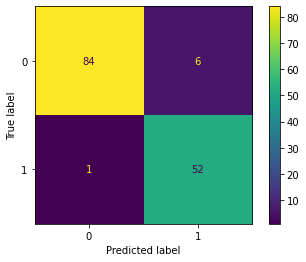

In [82]:
ConfusionMatrixDisplay.from_estimator(bag, X_test, y_test)

In [83]:
bag2 = BaggingClassifier(base_estimator=LogisticRegression(max_iter=10000), n_estimators=10, oob_score=True, random_state=0).fit(X_train, y_train)
bag2.oob_score_

c:\Users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:753: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.9553990610328639

In [84]:
car_df = pd.read_csv('CarPrice_Assignment.csv')
car_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [85]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [86]:
pd.concat([car_df.nunique(), car_df.dtypes], axis=1)

,0,1
car_ID,205,int64
symboling,6,int64
CarName,147,object
fueltype,2,object
aspiration,2,object
doornumber,2,object
carbody,5,object
drivewheel,3,object
enginelocation,2,object
wheelbase,53,float64


In [87]:
X = car_df.select_dtypes('number').iloc[:, :-1].values
y = car_df.loc[:, 'price']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [89]:
bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, oob_score=True, random_state=0).fit(X_train, y_train)
bag.oob_score_, bag.score(X_test, y_test)

(0.9328465811199695, 0.9009892265586237)

In [90]:
X = can_df.iloc[:, 2:].values
y = can_df.loc[:, 'diagnosis'].values

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [92]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, learning_rate=1.0).fit(X_train, y_train)
ada.score(X_train, y_train), ada.score(X_test, y_test)

(1.0, 0.986013986013986)

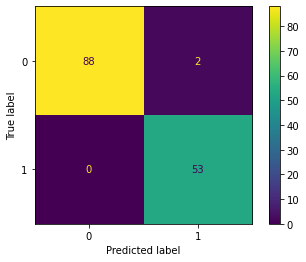

In [93]:
ConfusionMatrixDisplay.from_estimator(ada, X_test, y_test)

In [94]:
roc_auc_score(y_test, ada.predict(X_test))

0.9888888888888888

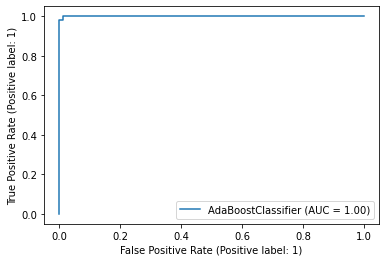

In [95]:
RocCurveDisplay.from_estimator(ada, X_test, y_test)

In [96]:
ada.feature_importances_.round(2)

array([0.01, 0.05, 0.  , 0.01, 0.02, 0.05, 0.03, 0.07, 0.04, 0.02, 0.03,
       0.03, 0.04, 0.06, 0.03, 0.05, 0.02, 0.02, 0.01, 0.03, 0.04, 0.08,
       0.05, 0.04, 0.05, 0.01, 0.03, 0.03, 0.03, 0.03])

In [97]:
X = car_df.select_dtypes('number').iloc[:, :-1].values
y = car_df.loc[:, 'price']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [99]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=0).fit(X_train, y_train)
ada.score(X_train, y_train), ada.score(X_test, y_test)

(0.9789993921624965, 0.8903049258238852)

In [100]:
X = can_df.iloc[:, 2:].values
y = can_df.loc[:, 'diagnosis'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [101]:
rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, random_state=0).fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.958041958041958

<AxesSubplot:>

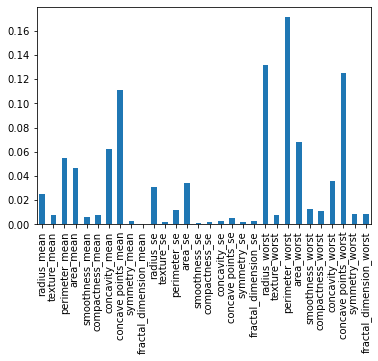

In [102]:
pd.Series(rf_clf.feature_importances_.round(3), index=can_df.iloc[:, 2:].columns).plot.bar()

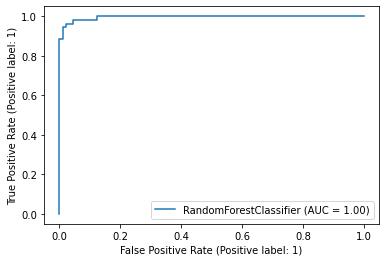

In [103]:
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test)

In [104]:
precision_recall_curve(y_test, rf_clf.predict(X_test))

(array([0.37062937, 0.92727273, 1.        ]),
 array([1.        , 0.96226415, 0.        ]),
 array([0, 1], dtype=int64))

In [105]:
print(classification_report(y_test, rf_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [106]:
X = car_df.select_dtypes('number').iloc[:, :-1].values
y = car_df.loc[:, 'price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [107]:
rf_reg = RandomForestRegressor(n_estimators=100, criterion='squared_error', min_samples_leaf=2).fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.9067921180296167

<AxesSubplot:>

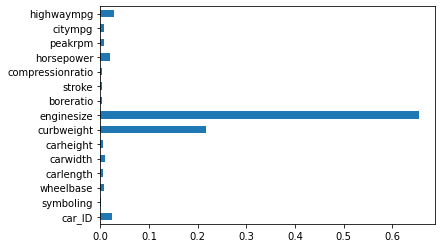

In [108]:
pd.Series(rf_reg.feature_importances_, index=car_df.select_dtypes('number').iloc[:, :-1].columns).plot.barh()

In [110]:
sky_df = pd.read_csv('Skyserver.csv')
sky_df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [111]:
sky_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [112]:
sky_df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

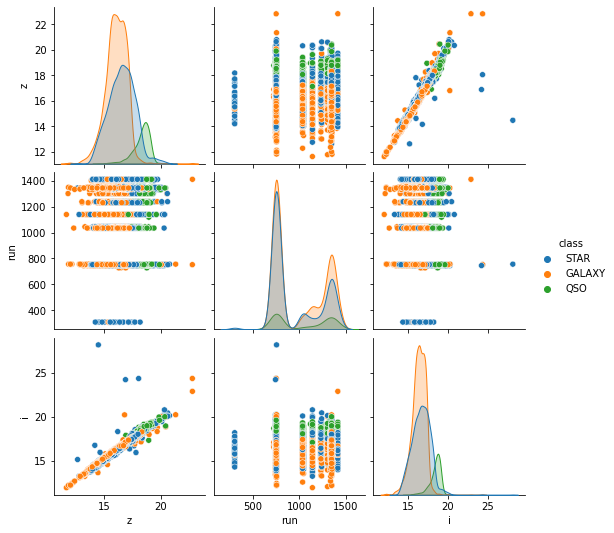

In [113]:
sns.pairplot(data=sky_df[['z', 'run', 'i', 'class']], hue='class')

In [114]:
features = list(sky_df.columns)
features.remove('class')

In [118]:
X = sky_df[features]
y= sky_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [119]:
gnb = GaussianNB().fit(X_train, y_train)
gnb.score(X_test, y_test)

0.8012

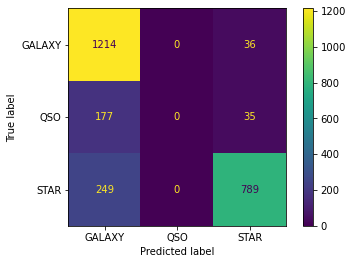

In [120]:
ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test)

In [136]:
file = open('SMSSpamCollection.tsv', mode='r', encoding='utf-8', newline='')
file_line = file.read().splitlines()
tab_line = [line.split('\t') for line in file_line]
tab_line

[['ham',
  'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
 ['ham', 'Ok lar... Joking wif u oni...'],
 ['spam',
  "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
 ['ham', 'U dun say so early hor... U c already then say...'],
 ['ham', "Nah I don't think he goes to usf, he lives around here though"],
 ['spam',
  "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"],
 ['ham',
  'Even my brother is not like to speak with me. They treat me like aids patent.'],
 ['ham',
  "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"],
 ['spam',
  'WINNER!! As a valued network customer you have been selected to receivea £

In [140]:
spam_df = pd.DataFrame(tab_line, columns=['class', 'contents'])
spam_df['label'] = spam_df['class'].replace({'ham':0, 'spam':1})
spam_df

,class,contents,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,1
5570,ham,Will ü b going to esplanade fr home?,0
5571,ham,"Pity, * was in mood for that. So...any other s...",0
5572,ham,The guy did some bitching but I acted like i'd...,0


In [141]:
X = spam_df['contents']
y = spam_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [151]:
cv = CountVectorizer(binary=True)
X_traincv = cv.fit_transform(X_train)
X_testcv = cv.transform(X_test)

In [160]:
encoded_input = X_traincv.toarray()
cv.inverse_transform(encoded_input[[0]])

[array(['how', 'is', 'kids', 'sister', 'your'], dtype='<U34')]

In [153]:
cv.get_feature_names_out()[1000:1010]

array(['are', 'area', 'aren', 'arent', 'arestaurant', 'aretaking',
       'areyouunique', 'argh', 'argue', 'arguing'], dtype=object)

In [154]:
bnb = BernoulliNB().fit(X_traincv, y_train)
bnb.score(X_testcv, y_test)

0.9748923959827833

In [161]:
X[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'